### Image Data Augmentation
#### by Keras using Kaggle MNIST

##### Goal
- Exercise on random rotation, shift, shear transform, zoom
- Exercise to use ImageDataGenerator

##### Note
- random_channel_shift is not tested as MNIST is in gray scale

##### Ref 
- Francois Chollet's tutorial https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
- Keras source code https://github.com/fchollet/keras/blob/master/keras/preprocessing/image.py

In [1]:
# Version 20170507 reuse an older version of notebook
# Version 20170515 revamp and refactorization, in-depth on keras image preprocessing
# Version 20170521 review image generator pipe

In [1]:
import pandas as pd
import keras

Using TensorFlow backend.


In [2]:
# Load Kaggle MNIST data
trainDF = pd.read_csv('../input/train.csv')
#testDF = pd.read_csv('../input/test.csv')

In [3]:
# Randomly pick one example
x = trainDF.iloc[550,0:784].reshape(1,28,28)

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

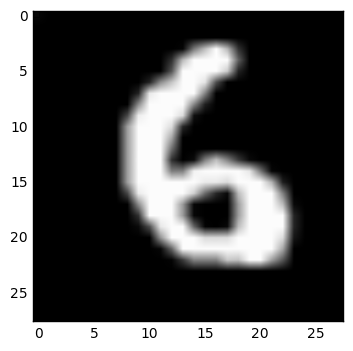

In [6]:
plt.imshow(x[0,:,:],cmap='gray')

In [7]:
from keras.preprocessing.image import random_rotation

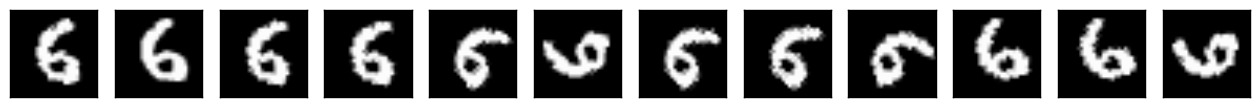

In [8]:
# Use random rotation
fig,ax = plt.subplots(1,12,figsize=[16,16])
for j in range(12):
    x1=random_rotation(x,rg=90)
    ax[j].set_xticks([])
    ax[j].set_yticks([])
    ax[j].imshow(x1[0,:,:],cmap='gray') 

In [9]:
from keras.preprocessing.image import random_shift

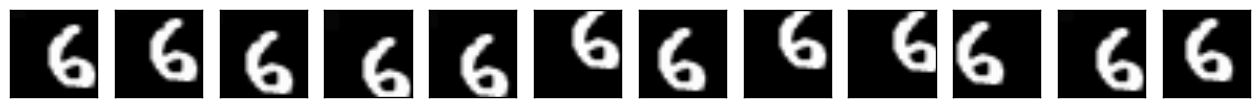

In [10]:
# Use random shift
fig,ax = plt.subplots(1,12,figsize=[16,16])
for j in range(12):
    x1=random_shift(x,wrg=.25,hrg=.25)
    ax[j].set_xticks([])
    ax[j].set_yticks([])
    ax[j].imshow(x1[0,:,:],cmap='gray') 

In [11]:
from keras.preprocessing.image import random_shear

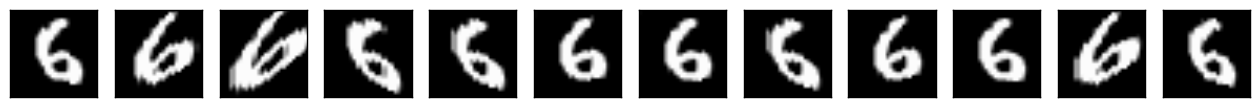

In [12]:
# Use random shear
fig,ax = plt.subplots(1,12,figsize=[16,16])
for j in range(12):
    x1=random_shear(x,intensity=1)
    ax[j].set_xticks([])
    ax[j].set_yticks([])
    ax[j].imshow(x1[0,:,:],cmap='gray') 

In [13]:
from keras.preprocessing.image import random_zoom

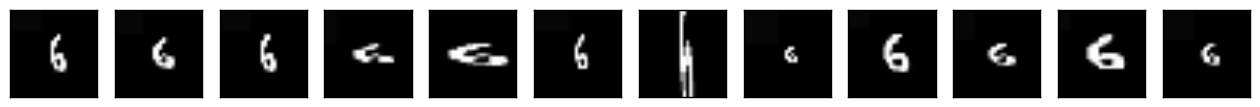

In [14]:
# Use random shear
fig,ax = plt.subplots(1,12,figsize=[16,16])
for j in range(12):
    x1=random_zoom(x,zoom_range=(.25,4.))
    ax[j].set_xticks([])
    ax[j].set_yticks([])
    ax[j].imshow(x1[0,:,:],cmap='gray') 

In [15]:
# Put together
from keras.preprocessing.image import ImageDataGenerator

In [16]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

In [22]:
X = trainDF.iloc[:,0:784].values.reshape(trainDF.shape[0],28,28,1)

In [23]:
X.shape

(42000, 28, 28, 1)

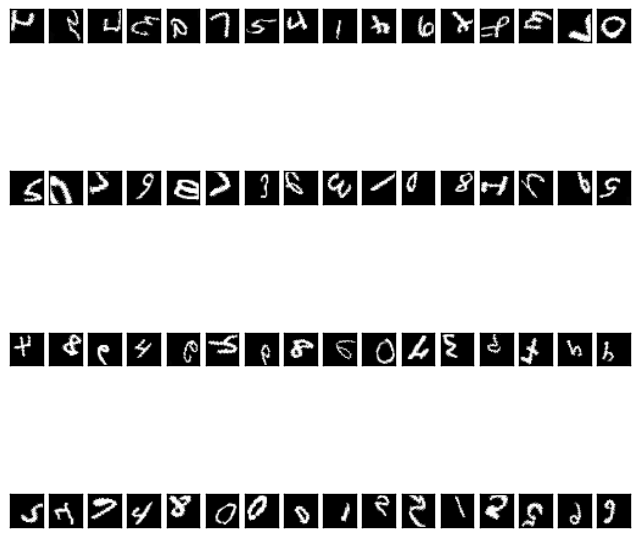

In [25]:
# Interactively play this cell over and over to see the effect of data augmentation
n_r, n_c = 4,16
x1=datagen.flow(X, batch_size=n_r*n_c).next()
fig,ax = plt.subplots(n_r,n_c,figsize=[8,8])
for j in range(n_r*n_c):    
    ax[j //n_c, j%n_c].set_xticks([])
    ax[j //n_c, j%n_c].set_yticks([])
    ax[j //n_c, j%n_c].imshow(x1[j,:,:,0],cmap='gray')    
plt.show()